# Import the Liabraries

In [1]:
!pip install alpha_vantage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.5/232.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.1/344.1 kB 22.7 MB/s eta 0:00:00


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from alpha_vantage.timeseries import TimeSeries

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Input

# Import the Dataset

In [4]:
from google.colab import userdata

API_KEY= userdata.get('alpha_vantage')

In [5]:
ts= TimeSeries(key=API_KEY, output_format='pandas')
data,meta_data=ts.get_daily(symbol='MCD',outputsize='full')

In [6]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-28,309.00,310.00,305.985,307.09,3211862.0
2025-03-27,315.16,316.64,310.680,312.69,3119455.0
2025-03-26,307.90,314.06,307.790,313.58,2624998.0
2025-03-25,306.93,308.66,304.030,306.92,2657170.0
2025-03-24,306.30,307.95,304.530,305.67,3443511.0


In [7]:
data.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low','4. close':'Close','5. volume':'Volume'},inplace=True)
data.head()

,Open,High,Low,Close,Volume
date,,,,,
2025-03-28,309.00,310.00,305.985,307.09,3211862.0
2025-03-27,315.16,316.64,310.680,312.69,3119455.0
2025-03-26,307.90,314.06,307.790,313.58,2624998.0
2025-03-25,306.93,308.66,304.030,306.92,2657170.0
2025-03-24,306.30,307.95,304.530,305.67,3443511.0


In [8]:
data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


In [9]:
data[::-1]

,Open,High,Low,Close,Volume
date,,,,,
1999-11-01,41.75,42.00,41.250,41.69,3932900.0
1999-11-02,42.06,42.13,41.060,41.25,2250000.0
1999-11-03,41.25,43.44,41.060,41.94,7600400.0
1999-11-04,43.69,45.25,43.440,45.19,9834800.0
1999-11-05,45.69,46.63,45.630,46.50,7184900.0
...,...,...,...,...,...
2025-03-24,306.30,307.95,304.530,305.67,3443511.0
2025-03-25,306.93,308.66,304.030,306.92,2657170.0
2025-03-26,307.90,314.06,307.790,313.58,2624998.0


In [10]:
# line plot for each columns
for col in data.columns:
  if col!='Volume':
    fig=px.line(data,y=col,title=col)
    fig.show()

In [11]:
fig=px.bar(data,y='Volume',title="Volume")
fig.update_layout(plot_bgcolor='black')
fig.show()

In [12]:
# candle stick pattern of the data
fig=go.Figure(data=[go.Candlestick(x=data.index,open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'])])
fig.update_layout(title="Candlestick Pattern", xaxis_title="Date", yaxis_title="Price")
fig.show()

# Data Preprocessing

In [13]:
data.head()

,Open,High,Low,Close,Volume
date,,,,,
2025-03-28,309.00,310.00,305.985,307.09,3211862.0
2025-03-27,315.16,316.64,310.680,312.69,3119455.0
2025-03-26,307.90,314.06,307.790,313.58,2624998.0
2025-03-25,306.93,308.66,304.030,306.92,2657170.0
2025-03-24,306.30,307.95,304.530,305.67,3443511.0


In [14]:
data=data[::-1]
data.head()

,Open,High,Low,Close,Volume
date,,,,,
1999-11-01,41.75,42.00,41.25,41.69,3932900.0
1999-11-02,42.06,42.13,41.06,41.25,2250000.0
1999-11-03,41.25,43.44,41.06,41.94,7600400.0
1999-11-04,43.69,45.25,43.44,45.19,9834800.0
1999-11-05,45.69,46.63,45.63,46.50,7184900.0


In [15]:
data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(data)

In [17]:
df

array([[0.09532941, 0.09385856, 0.0959423 , 0.094882  , 0.03614777],
       [0.09633698, 0.09427288, 0.09531651, 0.09345764, 0.01661618],
       [0.09370429, 0.09844791, 0.09531651, 0.0956913 , 0.07871244],
       ...,
       [0.96037963, 0.96092679, 0.97381595, 0.97504127, 0.02096837],
       [0.98397634, 0.96914938, 0.98333443, 0.97216018, 0.026707  ],
       [0.96395489, 0.94798738, 0.96787102, 0.95403192, 0.02777946]])

In [18]:
# Creating the Sequence
seq_len=30
X,y=[],[]

for i in range(len(df)-seq_len):
  X.append(df[i:i+seq_len])
  y.append(df[i+seq_len,3])

X=np.array(X)
y=np.array(y)

In [19]:
X

array([[[0.09532941, 0.09385856, 0.0959423 , 0.094882  , 0.03614777],
        [0.09633698, 0.09427288, 0.09531651, 0.09345764, 0.01661618],
        [0.09370429, 0.09844791, 0.09531651, 0.0956913 , 0.07871244],
        ...,
        [0.10508012, 0.10421646, 0.10625124, 0.10443171, 0.02483665],
        [0.10020476, 0.09924467, 0.10068507, 0.09993202, 0.0996553 ],
        [0.09981474, 0.09784237, 0.09841249, 0.09588553, 0.04965821]],

       [[0.09633698, 0.09427288, 0.09531651, 0.09345764, 0.01661618],
        [0.09370429, 0.09844791, 0.09531651, 0.0956913 , 0.07871244],
        [0.10163487, 0.10421646, 0.10315526, 0.10621217, 0.10464469],
        ...,
        [0.10020476, 0.09924467, 0.10068507, 0.09993202, 0.0996553 ],
        [0.09981474, 0.09784237, 0.09841249, 0.09588553, 0.04965821],
        [0.09614197, 0.09404978, 0.0959423 , 0.09345764, 0.04880981]],

       [[0.09370429, 0.09844791, 0.09531651, 0.0956913 , 0.07871244],
        [0.10163487, 0.10421646, 0.10315526, 0.10621217, 0.1

In [20]:
y

array([0.09345764, 0.09527047, 0.09527047, ..., 0.97504127, 0.97216018,
       0.95403192])

In [21]:
# Split the dataset into training and testing
test_size=int(len(X)*0.7)
X_train=X[:test_size]
y_train=y[:test_size]
X_test=X[test_size:]
y_test=y[test_size:]

In [22]:
X_train.shape[1],X_train.shape[2]

(30, 5)

# Model Creation

## 1. LSTM

In [23]:
# Adding feature dimension
if len(X_train.shape) == 2:
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

In [24]:
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.4),
    Dense(25),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [25]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae', 'mse'])

In [26]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0039 - mae: 0.0394 - mse: 0.0039 - val_loss: 0.0082 - val_mae: 0.0828 - val_mse: 0.0082
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 9.2356e-04 - mae: 0.0209 - mse: 9.2356e-04 - val_loss: 0.0023 - val_mae: 0.0413 - val_mse: 0.0023
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 7.5415e-04 - mae: 0.0195 - mse: 7.5415e-04 - val_loss: 0.0019 - val_mae: 0.0366 - val_mse: 0.0019
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.0900e-04 - mae: 0.0197 - mse: 7.0900e-04 - val_loss: 0.0069 - val_mae: 0.0772 - val_mse: 0.0069
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 7.1822e-04 - mae: 0.0199 - mse: 7.1822e-04 - val_loss: 9.2384e-04 - val_mae: 0.0244 - val_mse: 9.2384e-04
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 5.5076e-04 - mae: 0.0173 - mse: 5.5076e-04 - val_loss: 0.0023 - val_mae: 0.0419 - val_mse: 0.0023
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 32m

In [27]:
prediction=model.predict(X_test)
#empty array to match the original dataset shape
predictions_extended = np.zeros((prediction.shape[0], df.shape[1]))

# Place predictions in the 'Close' price column (index 3)
predictions_extended[:, 3] = prediction[:, 0]

# Inverse transform
predictions_original = scaler.inverse_transform(predictions_extended)[:, 3]

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


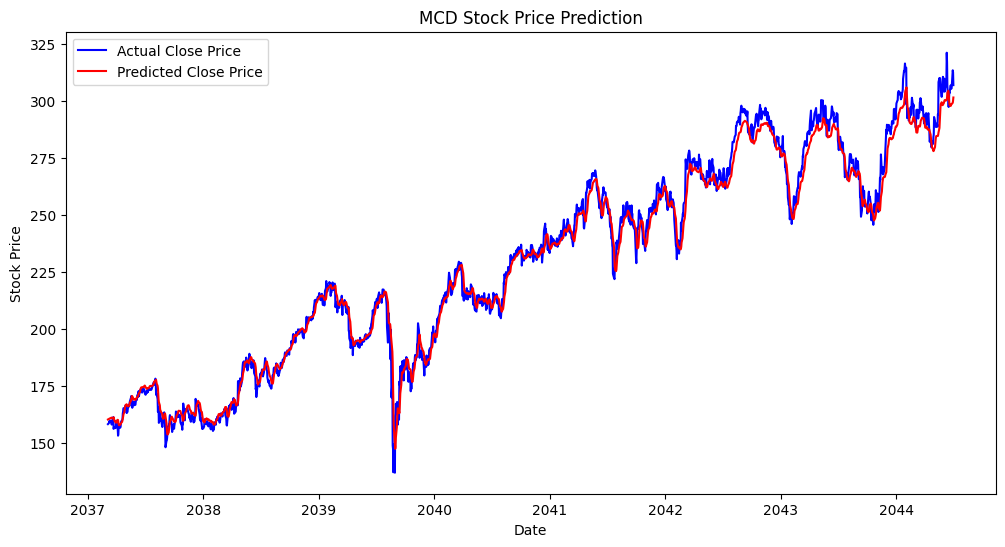

In [28]:
# Numpy array ➡️ Dataframe with Datetime index
if isinstance(df, np.ndarray):
    df = pd.DataFrame(df, columns=["Open", "High", "Low", "Close", "Volume"])  # Adjusting the  columns as need
    df["Date"] = pd.date_range(start="2020-01-01", periods=len(df), freq="B")  # Assuming business days
    df.set_index("Date", inplace=True)  # Setting 'Date' as index

plt.figure(figsize=(12, 6))

#an empty array with the same shape as the original dataset
y_test_extended = np.zeros((y_test.shape[0], df.shape[1]))  # Creating a placeholder array
y_test_extended[:, 3] = y_test  # Placed y_test in the 'Close' column (index 3)

#Inversing the transform only on the 'Close' prices
actual_prices = scaler.inverse_transform(y_test_extended)[:, 3]

# Getting the correct date range
date_range = df.index[-len(y_test):]

# Plotting the actual stock prices
plt.plot(date_range, actual_prices, label="Actual Close Price",color='blue')

# Plotting predicted stock prices
plt.plot(date_range, predictions_original, label="Predicted Close Price", color='red')

# Labels and title
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("MCD Stock Price Prediction")

plt.show()

